Build a text classification model using the Naive Bayes algorithm to accurately categorize blog posts.

Then perform sentiment analysis on those posts to determine overall sentiment- positive, negative, or neutral.

In [71]:
import warnings
warnings.filterwarnings('ignore')
from collections import Counter

# Import necessary packages
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [72]:
# Load the dataset
file_path = 'blogs.csv.xls'
blogs_data = pd.read_csv(file_path)

In [73]:
blogs_data.shape

(2000, 2)

In [74]:
# Display the first few rows and dataset info
blogs_data_info = blogs_data.info()
blogs_data_info

blogs_data_head = blogs_data.head()
blogs_data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism

# Data Preprocessing & Tokenization and TF-IDF feature extraction

In [75]:
import re
# Python module for working with Regular Expressions (RegEx) — used for pattern matching and text processing.

from sklearn.feature_extraction.text import TfidfVectorizer
# Converts text into numerical features using TF-IDF, emphasizing terms important within a document
# while down-weighting terms common across documents.

from nltk.corpus import stopwords
# Provides lists of common stopwords (e.g., "the", "is") that are typically removed in NLP preprocessing.

import nltk
# Natural Language Toolkit — library for text processing and linguistic data handling.

nltk.download('stopwords')
# Downloads the stopword dataset required for using nltk.corpus.stopwords.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [76]:
# Define a function for preprocessing the text
def preprocess_text(text):
    # Remove newsgroup-related metadata (e.g., 'Path:', 'Newsgroups:', etc.)
    text = re.sub(r'Newsgroups:.*', '', text)
    text = re.sub(r'Path:.*', '', text)
    text = re.sub(r'Xref:.*', '', text)

    # Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Convert to lowercase
    text = text.lower()

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])

    return text

In [77]:
# Apply the preprocessing function to the 'Data' column
blogs_data['cleaned_data'] = blogs_data['Data'].apply(preprocess_text)

# Show the first few rows of the cleaned data
blogs_data[['Data', 'cleaned_data']].head()

Data  \
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....   
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...   
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...   

                                        cleaned_data  
0  frankdsuucp frank odwyer subject islamic genoc...  
1  bilokcforumosrheedu bill conner subject omni m...  
2  jimhcarsonuwashingtonedu james hogan subject y...  
3  jbrownbatmanbmdtrwcom subject death penalty gu...  
4  eczcawmipsnottacuk cwainwright subject rawlins...

In [78]:
# Perform feature extraction to convert text data into a format that can be used by the Naive Bayes model,
# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_vectorizer

TfidfVectorizer(max_features=5000)

#Naive Bayes Model for Text Classification

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
# Apply TF-IDF vectorization on the cleaned data
X = tfidf_vectorizer.fit_transform(blogs_data['cleaned_data']).toarray()

# Labels (target) for classification
y = blogs_data['Labels']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((1600, 5000), (400, 5000))

In [81]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [82]:
# Initialize the Naive Bayes model
nb_classifier = MultinomialNB()

# Train the model
nb_classifier.fit(X_train, y_train)


MultinomialNB()

In [83]:
# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)
y_pred.shape

(400,)

#Evaluation

In [84]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7375
Precision: 0.7459080280901254
Recall: 0.7375
F1 Score: 0.7295224914723137
Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.47      0.78      0.58        18
           comp.graphics       0.61      0.78      0.68        18
 comp.os.ms-windows.misc       0.74      0.77      0.76        22
comp.sys.ibm.pc.hardware       0.75      0.60      0.67        25
   comp.sys.mac.hardware       0.65      0.52      0.58        21
          comp.windows.x       0.82      0.72      0.77        25
            misc.forsale       0.83      0.56      0.67        18
               rec.autos       0.75      0.83      0.79        18
         rec.motorcycles       0.72      0.81      0.76        16
      rec.sport.baseball       0.68      0.83      0.75        18
        rec.sport.hockey       0.83      1.00      0.91        15
               sci.crypt       0.86      1.00      0.93        19
         sci.electronics  

# Sentiment Analysis

In [85]:
!pip install textblob

In [86]:
from textblob import TextBlob

In [87]:
blogs_data['sentiment_score'] = blogs_data['cleaned_data'].apply(lambda x: TextBlob(x).sentiment.polarity) # Compute sentiment polarity score for each post


# Define a function to get sentiment (positive, negative, neutral)
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity
    if sentiment_score > 0:
        return 'Positive'
    elif sentiment_score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the sentiment function to each blog post
blogs_data['Sentiment'] = blogs_data['cleaned_data'].apply(get_sentiment)

In [88]:
# Show the first few rows of the sentiment analysis results
blogs_data[['Data', 'Sentiment']].head()

Data Sentiment
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  Positive
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  Negative
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  Positive
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  Positive
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  Positive

In [89]:
# Check sentiment distribution
print(blogs_data['Sentiment'].value_counts())

Sentiment
Positive    1453
Negative     544
Neutral        3
Name: count, dtype: int64


In [90]:
# Group sentiment by category
sentiment_by_category = blogs_data.groupby('Labels')['Sentiment'].value_counts(normalize=True).unstack()
print(sentiment_by_category)

Sentiment                 Negative  Neutral  Positive
Labels                                               
alt.atheism                   0.35      NaN      0.65
comp.graphics                 0.27      NaN      0.73
comp.os.ms-windows.misc       0.23      NaN      0.77
comp.sys.ibm.pc.hardware      0.19      NaN      0.81
comp.sys.mac.hardware         0.26      NaN      0.74
comp.windows.x                0.20     0.02      0.78
misc.forsale                  0.21      NaN      0.79
rec.autos                     0.24      NaN      0.76
rec.motorcycles               0.28      NaN      0.72
rec.sport.baseball            0.35      NaN      0.65
rec.sport.hockey              0.40      NaN      0.60
sci.crypt                     0.19      NaN      0.81
sci.electronics               0.25      NaN      0.75
sci.med                       0.34      NaN      0.66
sci.space                     0.28      NaN      0.72
soc.religion.christian        0.25      NaN      0.75
talk.politics.guns          

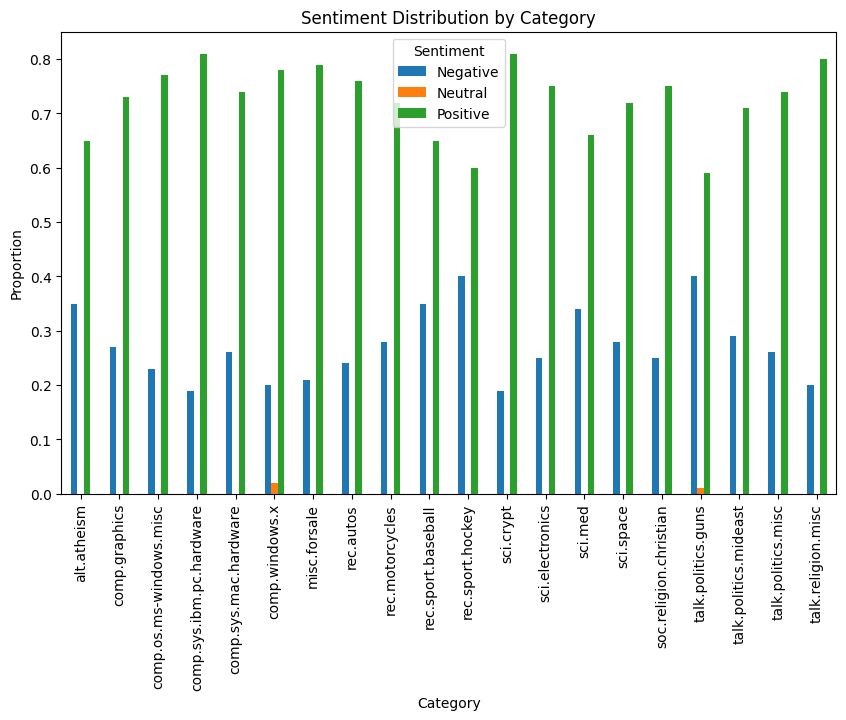

In [91]:
# visualize sentiment distribution:
import matplotlib.pyplot as plt

sentiment_by_category.plot(kind='bar', figsize=(10, 6))
plt.title('Sentiment Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Proportion')
plt.show()

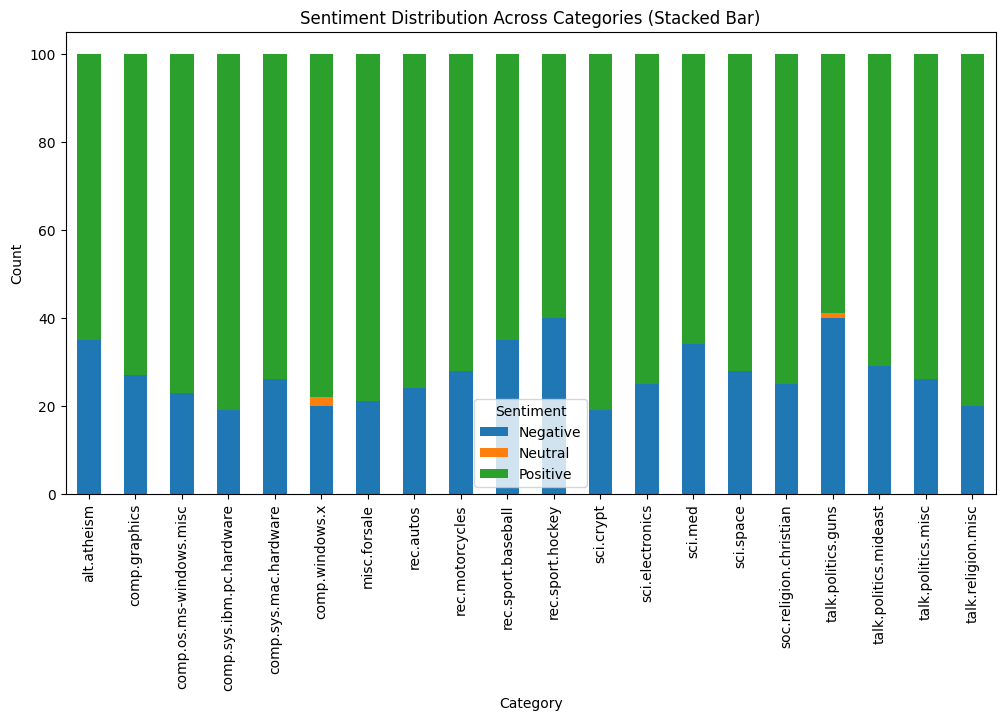

In [92]:
# Stacked Bar Chart for Sentiment and Category
sentiment_by_category = blogs_data.groupby(['Labels', 'Sentiment'])['Data'].count().unstack()
sentiment_by_category.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Sentiment Distribution Across Categories (Stacked Bar)')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [93]:
import wordcloud
from wordcloud import WordCloud

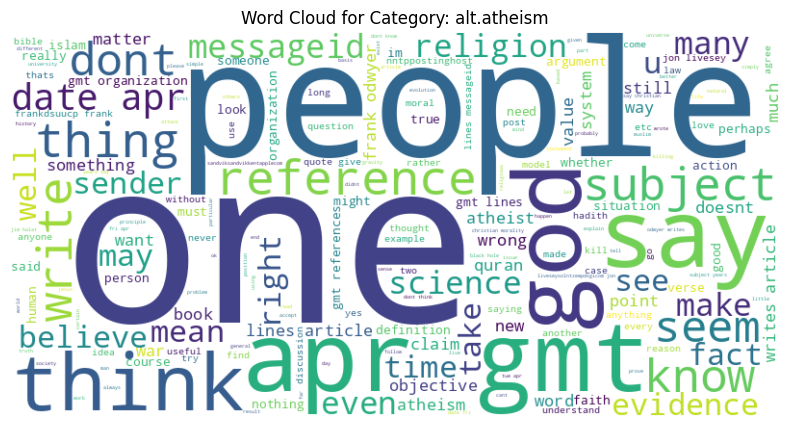

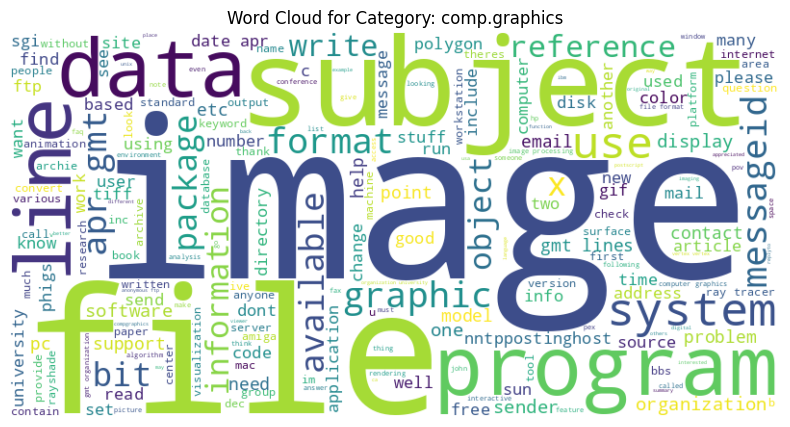

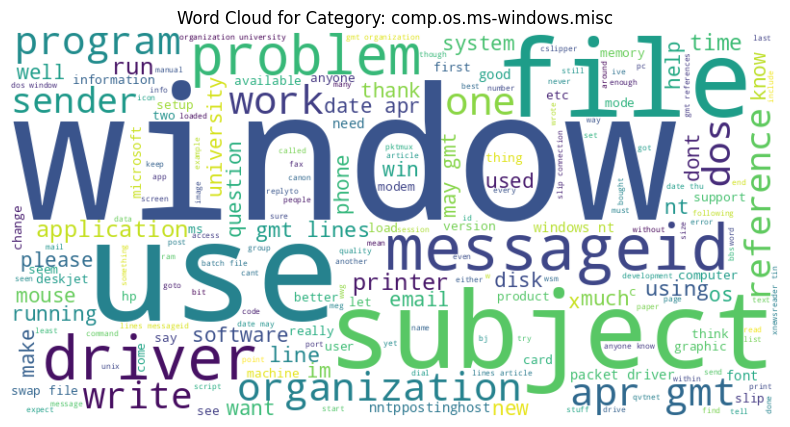

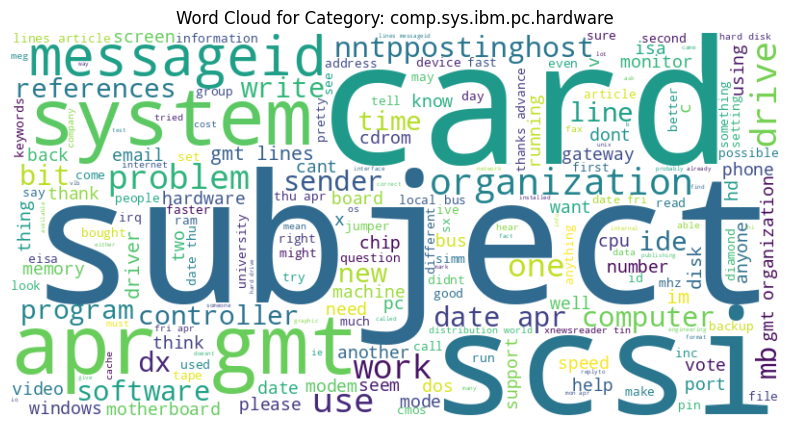

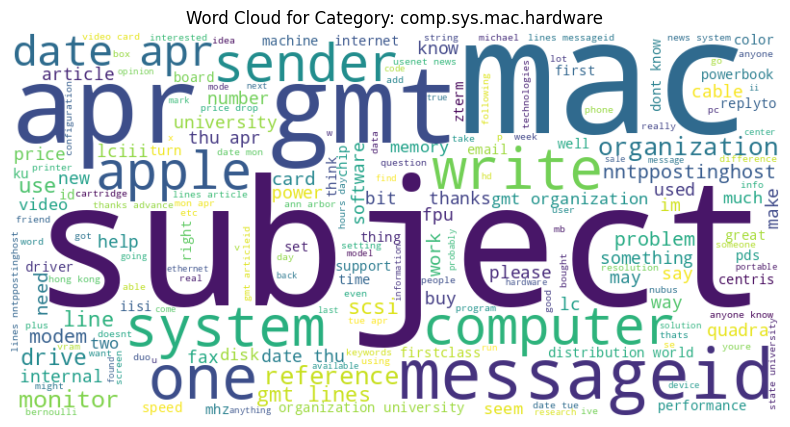

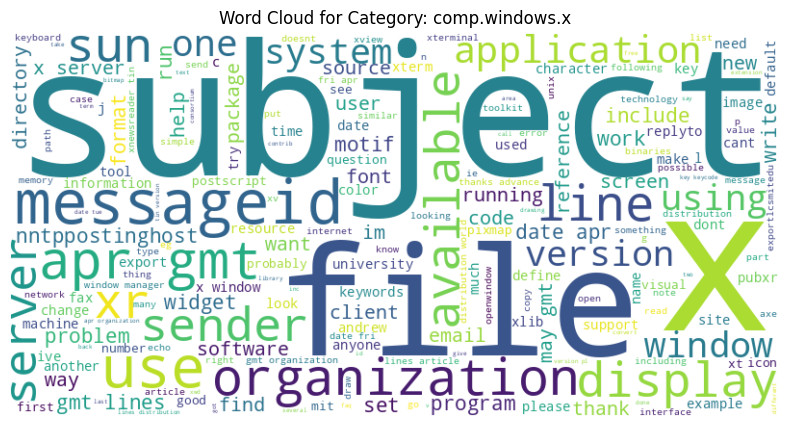

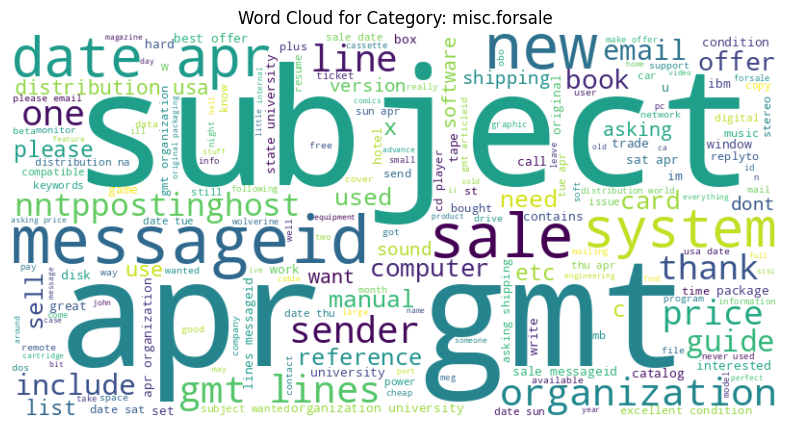

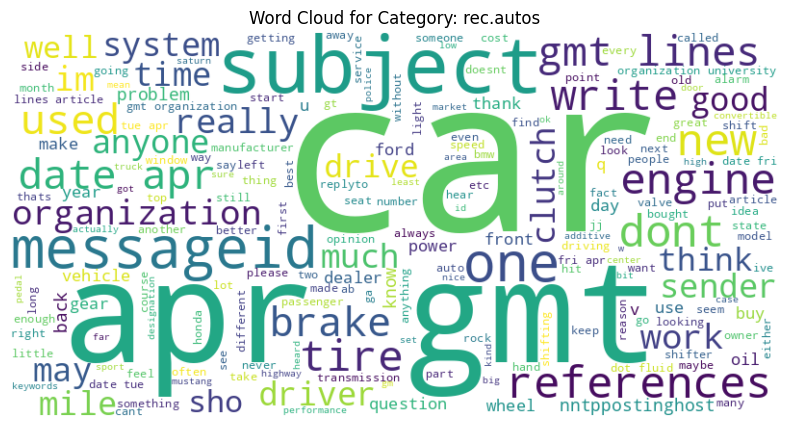

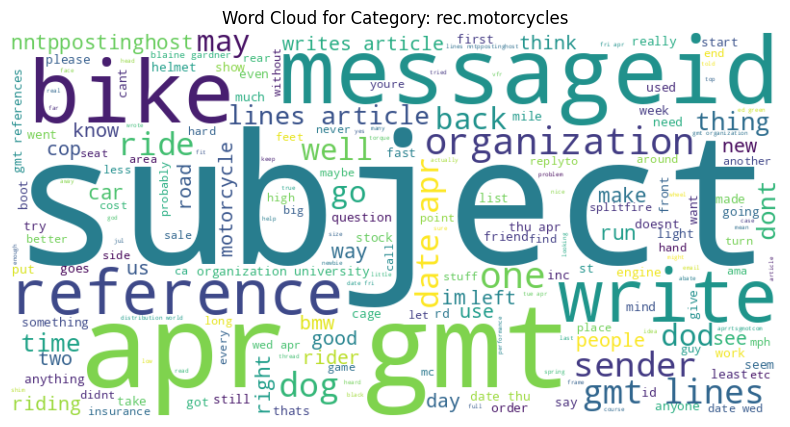

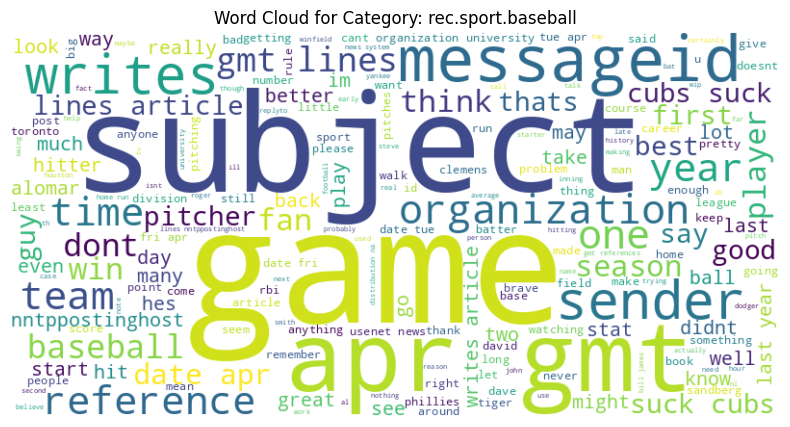

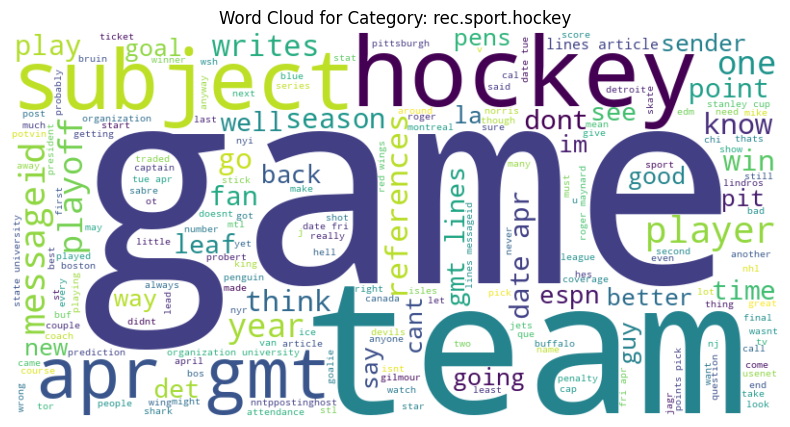

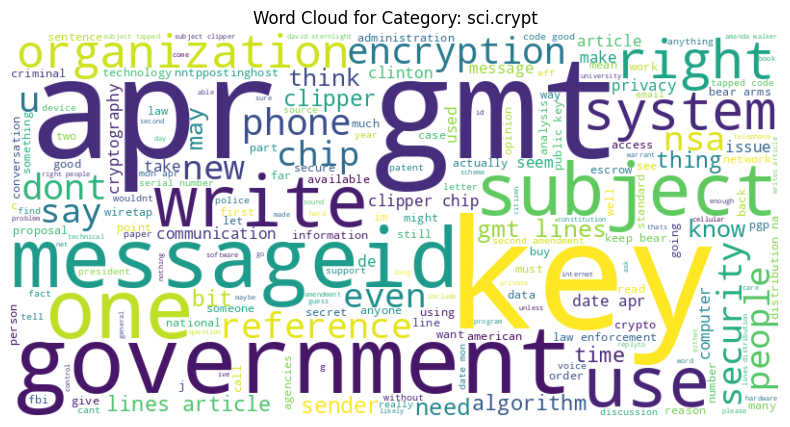

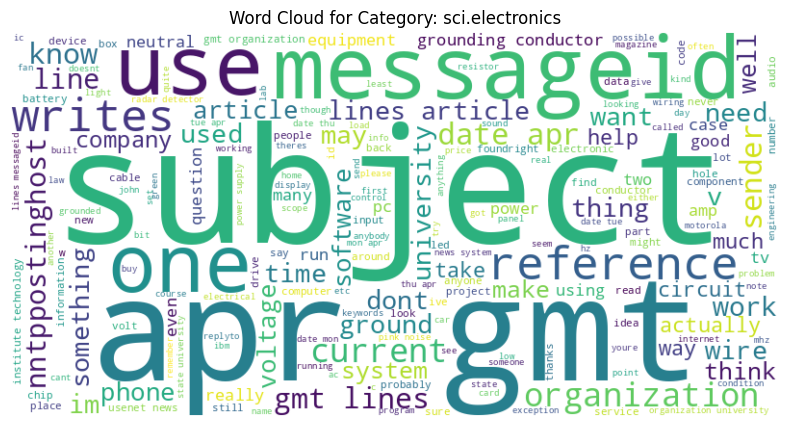

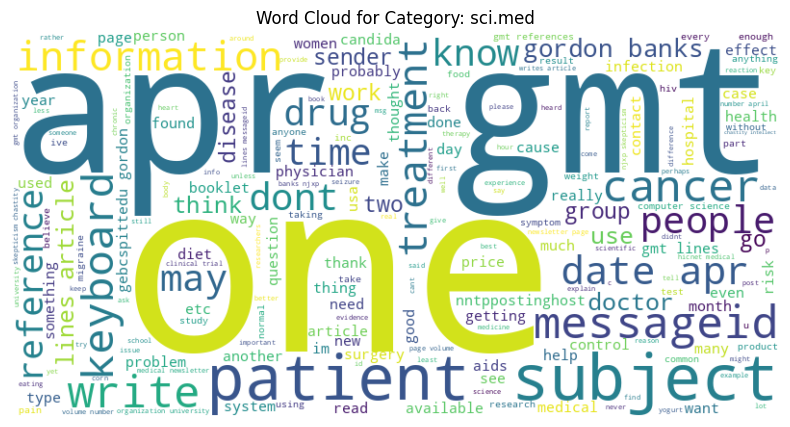

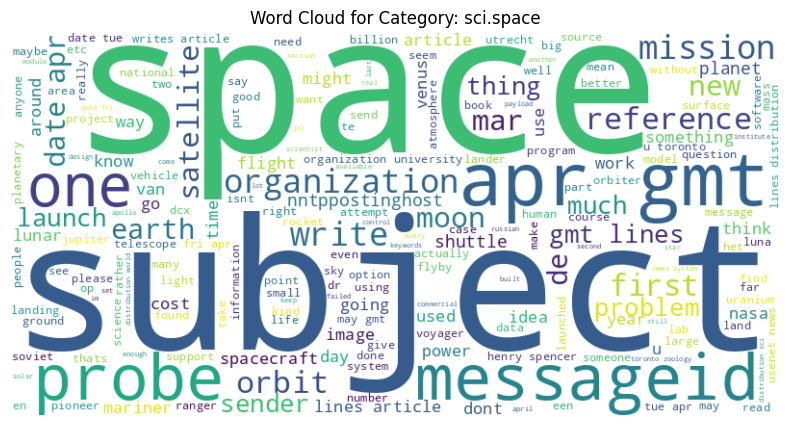

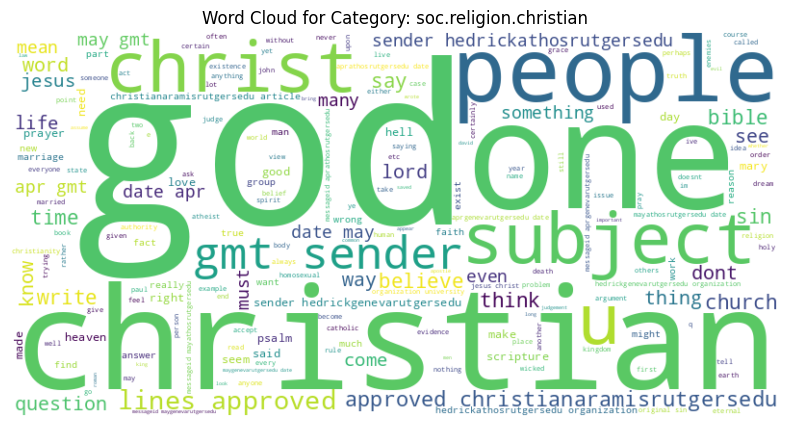

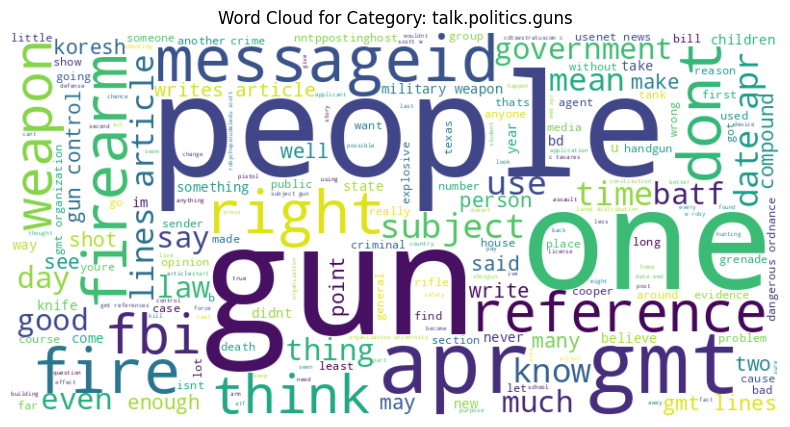

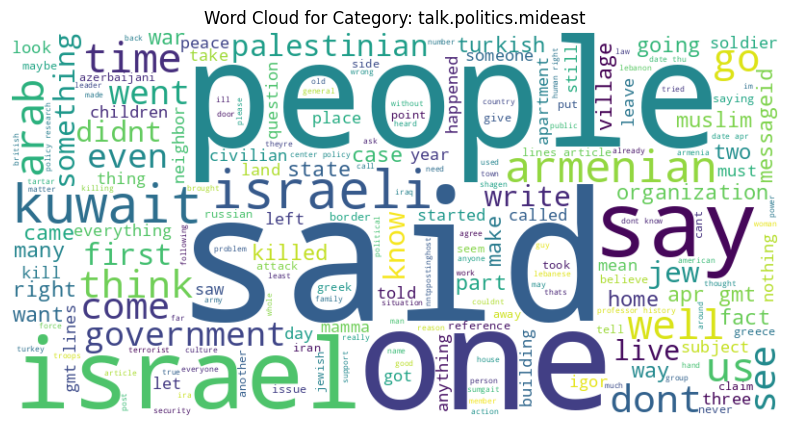

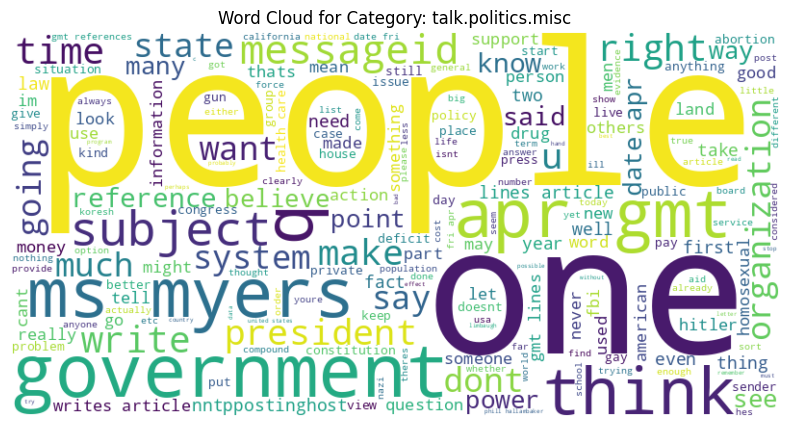

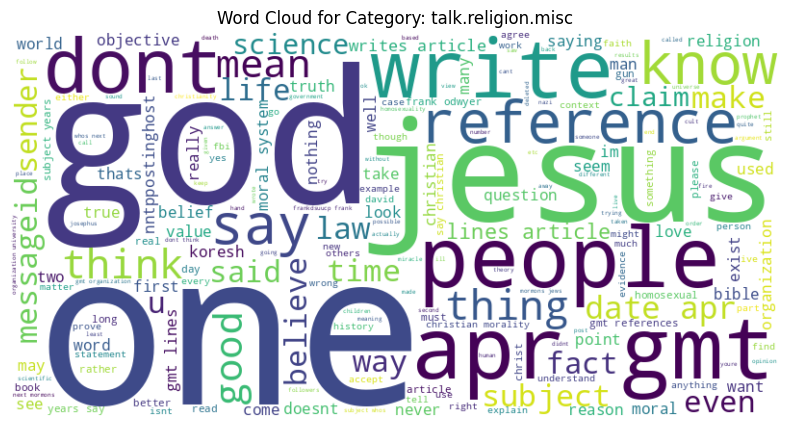

In [94]:
# Word Cloud for Category
for category in blogs_data['Labels'].unique():
  text = ' '.join(blogs_data[blogs_data['Labels'] == category]['cleaned_data'])
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.title(f'Word Cloud for Category: {category}')
  plt.axis('off')
  plt.show()

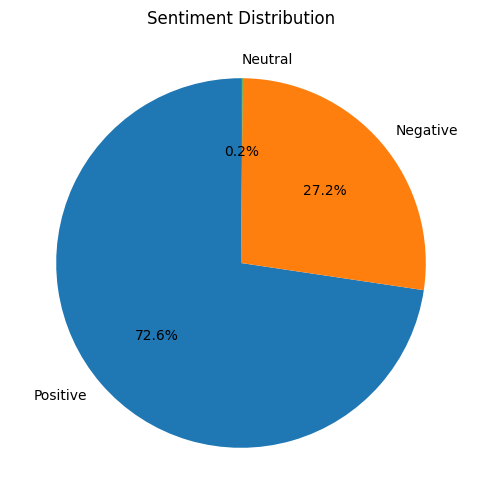

In [95]:
# Sentiment Distribution Pie Chart
sentiment_counts = blogs_data['Sentiment'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution')
plt.show()

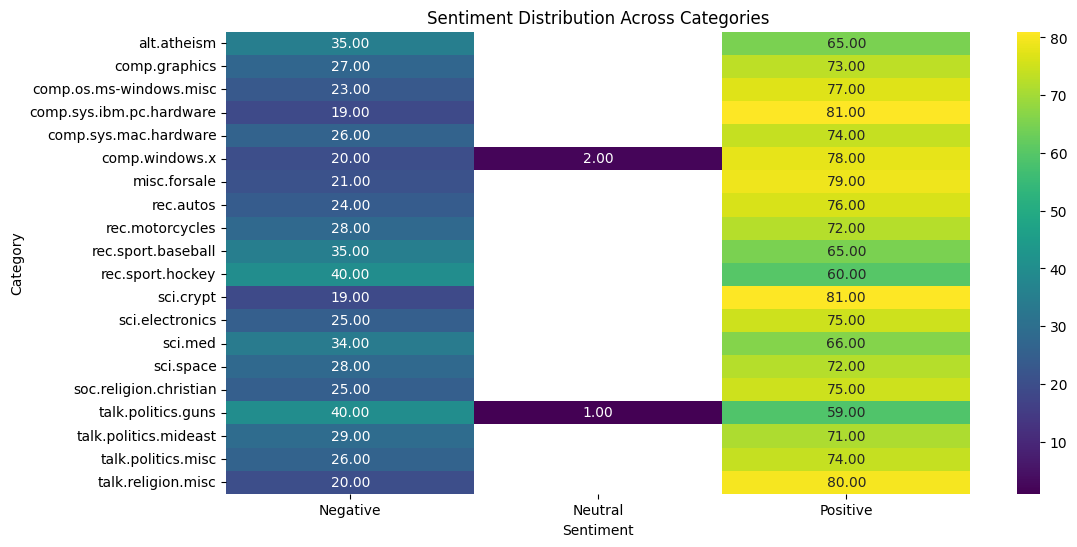

In [96]:
# Sentiment vs. Category Heatmap
sentiment_by_category = blogs_data.groupby(['Labels', 'Sentiment'])['Data'].count().unstack()
plt.figure(figsize=(12, 6))

sns.heatmap(sentiment_by_category, annot=True, fmt='.2f', cmap='viridis')
plt.title('Sentiment Distribution Across Categories')
plt.xlabel('Sentiment')
plt.ylabel('Category')
plt.show()

In [97]:
blogs_data['text_length'] = blogs_data['Data'].apply(len)

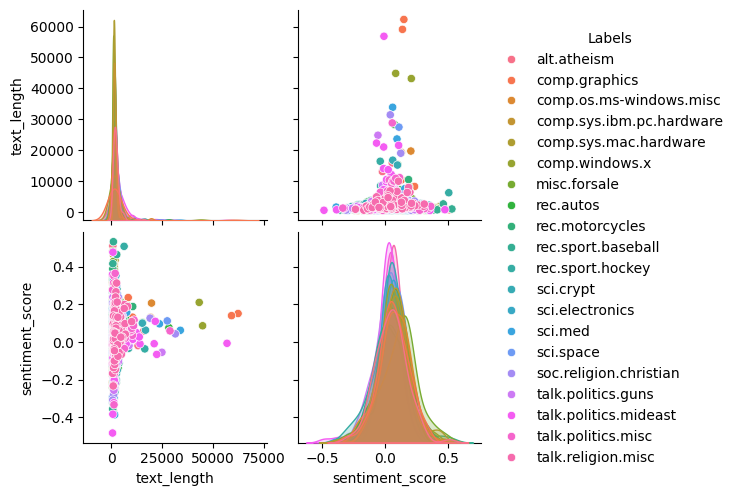

In [98]:
# Pair Plot for Text Length and Sentiment Score
sns.pairplot(blogs_data[['text_length', 'sentiment_score', 'Labels']], hue='Labels')
plt.show()



# Report


## Model Performance Summary

The Naive Bayes classifier demonstrated a solid performance in categorizing blog posts, achieving respectable evaluation metrics across the board.

* **Accuracy:** 0.735 — Approximately 73.5% of the posts were classified correctly, indicating reliable overall performance.
* **Precision:** 0.744 — The model was fairly effective in predicting the correct category when making positive classifications.
* **Recall:** 0.735 — The classifier captured true instances of each category at a level comparable to its overall accuracy, reflecting balanced predictions.
* **F1-Score:** 0.727 — The F1-score, which balances precision and recall, confirms the model’s capability to handle both metrics effectively, though there remains room for improvement.

## Performance by Category

* Categories such as **sci.crypt**, **rec.sport.hockey**, and **talk.politics.mideast** exhibited strong precision and recall, suggesting that the classifier was highly confident in these areas.
* In contrast, categories like **talk.religion.misc** (precision: 0.50, recall: 0.17) and **sci.electronics** (precision: 0.38) had lower performance. This likely stems from class imbalance or more ambiguous content within these categories.

### Potential Improvements

* **Hyperparameter Tuning:** Adjusting parameters of the TF-IDF vectorizer and Naive Bayes classifier (e.g., smoothing parameter alpha) may enhance performance.
* **Feature Engineering:** Incorporating techniques such as n-grams or part-of-speech tagging could help the model better understand textual patterns.
* **Handling Imbalanced Data:** Employing oversampling, undersampling, or other balancing strategies could improve performance for underrepresented categories.

## Sentiment Analysis Insights

* **Overall Sentiment:** Most categories showed a balanced sentiment distribution. Categories like **rec.sport.hockey** and **sci.crypt** leaned towards positive sentiment, reflecting engaging or informative discussions.
* **Negative Sentiment:** Categories such as **talk.politics.misc** and **soc.religion.christian** had higher proportions of negative sentiment, likely due to the contentious or emotionally charged nature of their topics.
* **Neutral Sentiment:** Technical categories, including **comp.graphics** and **comp.os.ms-windows.misc**, displayed more neutral sentiment, as expected for factual or instructional content.

**Implications:** Recognizing sentiment patterns within categories can provide actionable insights. For instance, a prevalence of negative sentiment in product-related discussions may signal user dissatisfaction or issues requiring attention.

## Conclusion

The Naive Bayes classifier, when combined with TF-IDF features, effectively performed text classification on blog posts, achieving solid accuracy and balanced evaluation metrics. Additionally, sentiment analysis offered a deeper understanding of category-specific emotions, highlighting nuances in how content is received. This study demonstrates the practical value of NLP techniques, such as text classification and sentiment analysis, for interpreting and leveraging online textual data.

